In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_excel("C:/Users/2261092/Downloads/CompData-1.xlsx")
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [4]:
df.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,17572.113217,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,21892.886518,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,4.000000,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,3674.000000,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,6240.000000,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,24280.750000,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,72493.000000,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


In [5]:
df.shape

(2058, 58)

In [6]:
df.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,17572.113217,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,21892.886518,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,4.000000,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,3674.000000,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,6240.000000,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,24280.750000,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,72493.000000,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [8]:
df.isna().sum().sort_values(ascending=False)

_Cash_Flow_Per_Share                                 167
_Cash_to_Total_Assets                                 96
_Total_debt_to_Total_net_worth                        21
_Current_Liability_to_Current_Assets                  14
_Cash_Turnover_Rate                                    0
_Quick_Assets_to_Current_Liability                     0
_Cash_to_Current_Liability                             0
_Operating_Funds_to_Liability                          0
_Inventory_to_Working_Capital                          0
_Inventory_to_Current_Liability                        0
_Long_term_Liability_to_Current_Assets                 0
_Retained_Earnings_to_Total_Assets                     0
_Total_income_to_Total_expense                         0
_Total_expense_to_Assets                               0
_Current_Asset_Turnover_Rate                           0
_Quick_Asset_Turnover_Rate                             0
Co_Code                                                0
_Quick_Assets_to_Total_Assets  

In [9]:
df.isna().sum().sum()

298

In [10]:
df.shape

(2058, 58)

### Treating missing values

<AxesSubplot:>

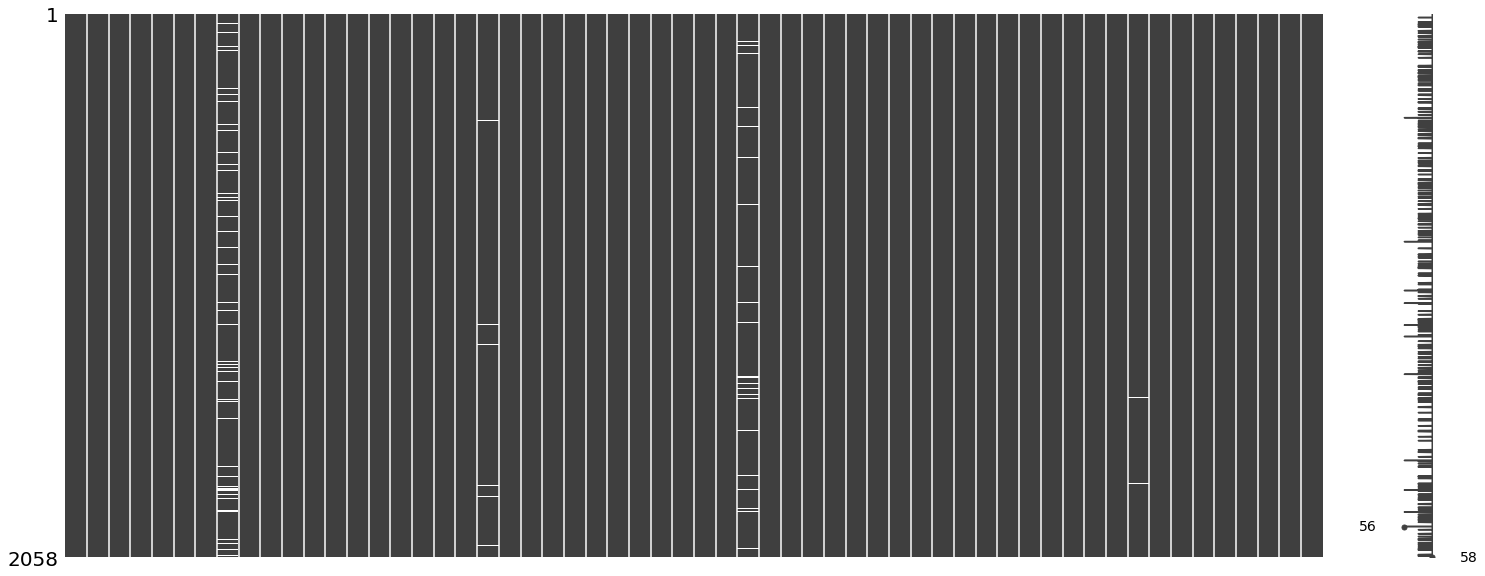

In [11]:
import missingno as msno
msno.matrix(df)

In [12]:
df['_Cash_Flow_Per_Share'].fillna(df['_Cash_Flow_Per_Share'].mean(), inplace = True)

In [13]:
df['_Cash_to_Total_Assets'].fillna(df['_Cash_to_Total_Assets'].mean(), inplace = True)

In [14]:
df['_Total_debt_to_Total_net_worth'].fillna(df['_Total_debt_to_Total_net_worth'].mean(), inplace = True)

In [15]:
df['_Current_Liability_to_Current_Assets'].fillna(df['_Current_Liability_to_Current_Assets'].mean(), inplace = True)

In [16]:
df.isna().sum().sum()

0

### Dropping rows with missing values after fixing variables


In [17]:
df.dropna()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,...,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662,0
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,...,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740,0
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,...,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984,0
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,...,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553,0


In [18]:
df.shape

(2058, 58)

In [19]:
df.isna().sum().sum()

0

## Checking for duplicate data

In [20]:
df.duplicated().sum()

0

## Dropping unrequired columns

In [21]:
df = df.drop(['Co_Code', 'Co_Name'], axis = 1)
df.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


## Checking distribution of all variables

<AxesSubplot:>

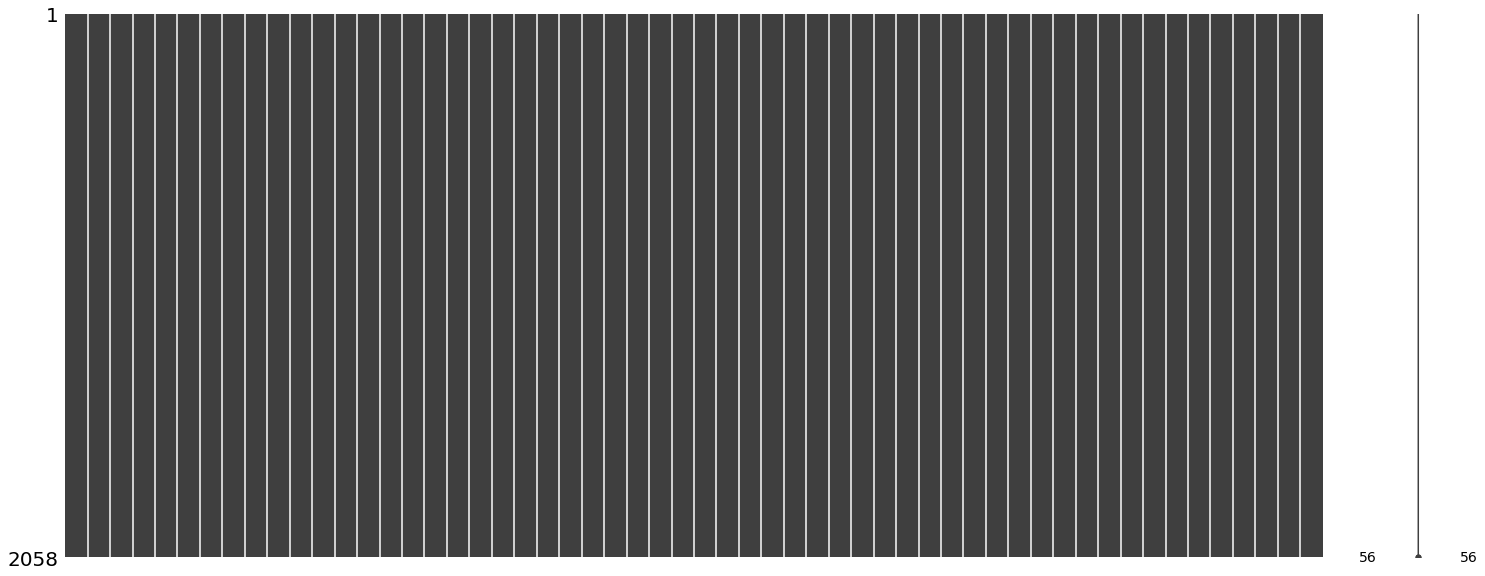

In [22]:
import missingno as msno
msno.matrix(df)

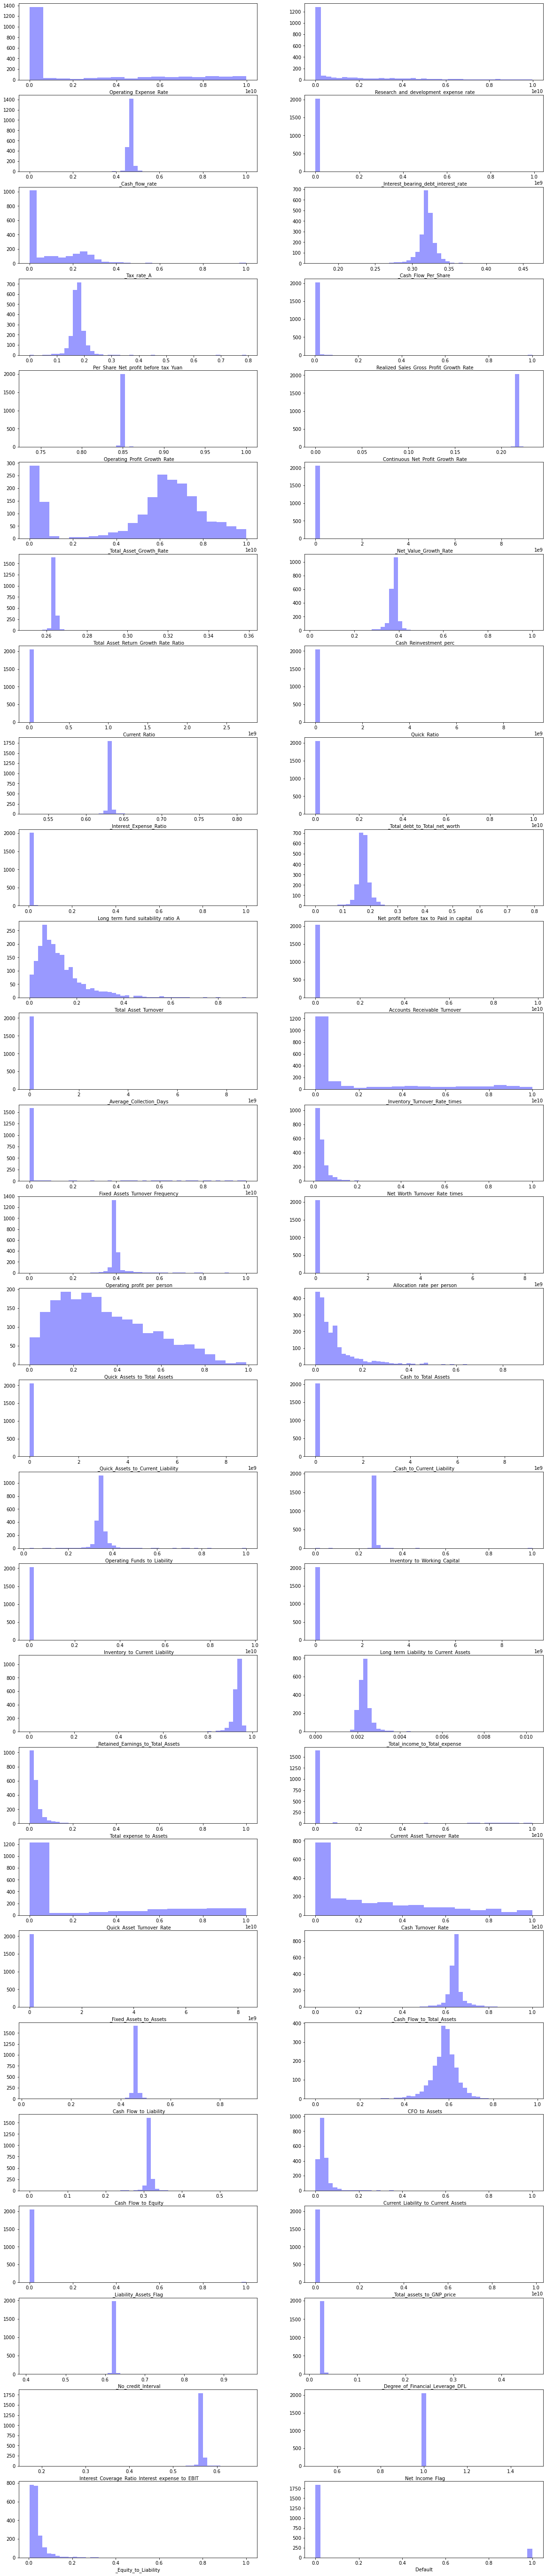

In [23]:
fig, ax = plt.subplots(figsize = (20, 100), nrows = 28, ncols = 2)

for i, col in enumerate(df.columns):
        sns.distplot(df[col], ax = ax[i//2, i%2], kde = False, color = 'blue')

## Checking skewness in the data

In [24]:
pd.DataFrame(df.skew().sort_values(ascending=False),columns=['Skewness'])

,Skewness
_Fixed_Assets_to_Assets,45.365185
_Current_Ratio,45.365185
_Realized_Sales_Gross_Profit_Growth_Rate,44.463130
_Net_Value_Growth_Rate,44.108614
_Allocation_rate_per_person,38.170448
_Total_debt_to_Total_net_worth,30.985198
_Total_Asset_Return_Growth_Rate_Ratio,29.695252
_Inventory_to_Working_Capital,27.471984
_Quick_Assets_to_Current_Liability,26.314266
_Degree_of_Financial_Leverage_DFL,25.170025


## Outlier Analysis

In [25]:
#outlier analysis

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
med = df.median()
IQR = q3 - q1

#checking extreme outliers (3x)
upper_limit = q3 + (3 * IQR)   
lower_limit = q1 - (3 * IQR)

### What percent of values in each column are outliers

In [26]:
((df > upper_limit).sum()/len(df)*100).sort_values(ascending=False)

_Fixed_Assets_Turnover_Frequency                     23.955296
_Current_Asset_Turnover_Rate                         22.011662
Default                                              10.689990
_Accounts_Receivable_Turnover                         9.912536
_Degree_of_Financial_Leverage_DFL                     9.329446
_Operating_profit_per_person                          8.309038
_Cash_to_Current_Liability                            7.628766
_Long_term_fund_suitability_ratio_A                   7.482993
_Total_assets_to_GNP_price                            6.997085
_Long_term_Liability_to_Current_Assets                6.559767
_Cash_Flow_to_Liability                               6.511176
_Realized_Sales_Gross_Profit_Growth_Rate              6.511176
_Net_Value_Growth_Rate                                5.976676
_Allocation_rate_per_person                           5.928086
_Research_and_development_expense_rate                5.102041
_Interest_Coverage_Ratio_Interest_expense_to_EBIT     5

In [27]:
((df < lower_limit).sum()/len(df)*100).sort_values(ascending=False)

_No_credit_Interval                                  8.066084
_Continuous_Net_Profit_Growth_Rate                   6.365403
_Cash_Flow_to_Liability                              5.150632
_Retained_Earnings_to_Total_Assets                   4.421769
_Interest_Coverage_Ratio_Interest_expense_to_EBIT    4.324587
_Interest_Expense_Ratio                              3.547133
_Operating_Profit_Growth_Rate                        3.449951
_Degree_of_Financial_Leverage_DFL                    3.352770
_Cash_Flow_to_Equity                                 3.158406
_Cash_Flow_to_Total_Assets                           3.109815
_Operating_profit_per_person                         3.109815
_Cash_Reinvestment_perc                              2.575316
_Realized_Sales_Gross_Profit_Growth_Rate             2.332362
_Total_Asset_Return_Growth_Rate_Ratio                2.186589
_Cash_Flow_Per_Share                                 2.137998
_Inventory_to_Working_Capital                        1.943635
_Operati

In [28]:
(((df>upper_limit).sum()+(df<lower_limit).sum())/len(df)*100).sort_values(ascending=False)

_Fixed_Assets_Turnover_Frequency                     23.955296
_Current_Asset_Turnover_Rate                         22.011662
_Degree_of_Financial_Leverage_DFL                    12.682216
_Cash_Flow_to_Liability                              11.661808
_No_credit_Interval                                  11.564626
_Operating_profit_per_person                         11.418853
_Continuous_Net_Profit_Growth_Rate                   11.078717
Default                                              10.689990
_Accounts_Receivable_Turnover                         9.912536
_Interest_Coverage_Ratio_Interest_expense_to_EBIT     9.329446
_Realized_Sales_Gross_Profit_Growth_Rate              8.843537
_Operating_Profit_Growth_Rate                         8.260447
_Interest_Expense_Ratio                               7.677357
_Cash_to_Current_Liability                            7.628766
_Long_term_fund_suitability_ratio_A                   7.482993
_Cash_Flow_to_Total_Assets                            7

## Since there are a significant number of records which are outliers, it will change the essence of the data, if we treat outliers. Also the outliers are present due to the nature.

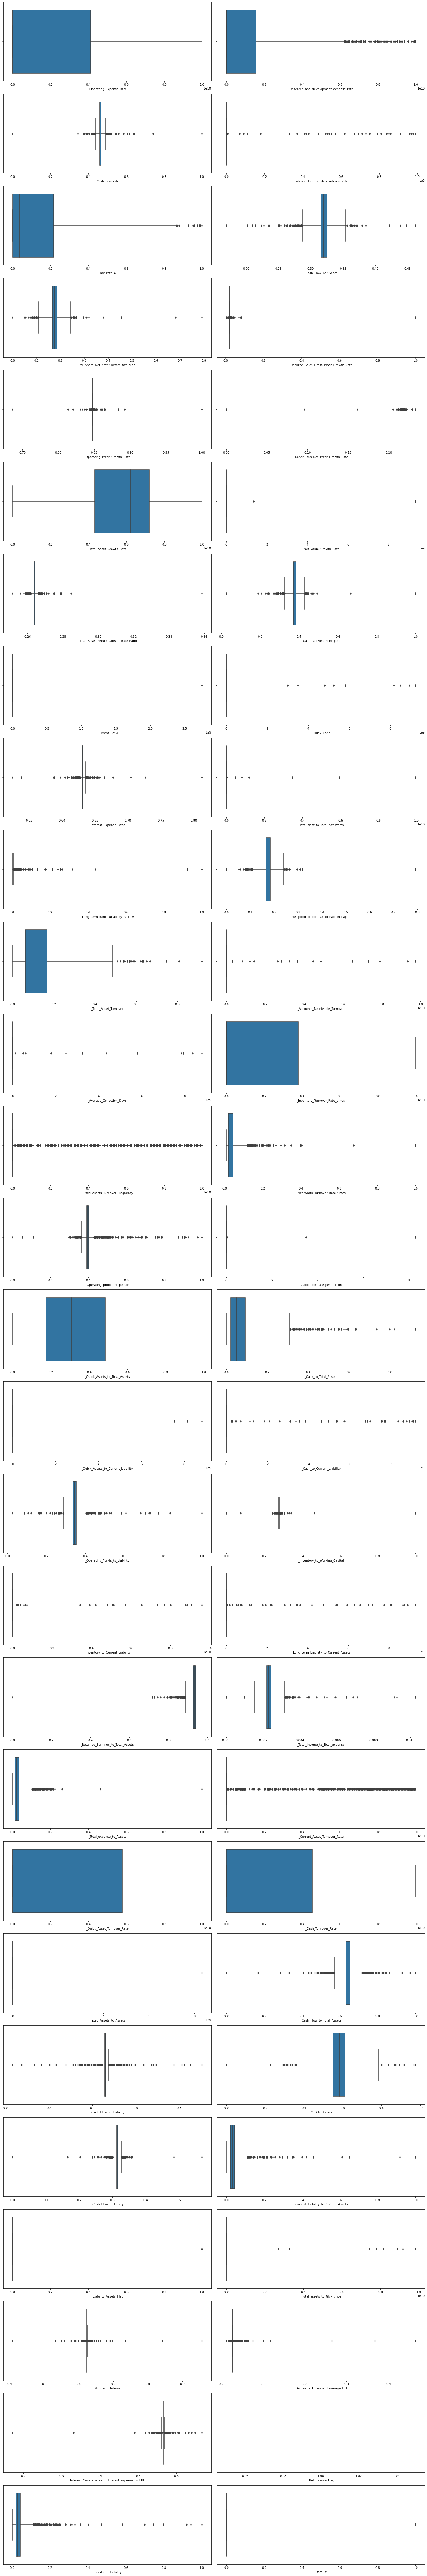

In [29]:
#boxplots with extreme whiskers (+/- 3*IQR)

fig, ax = plt.subplots(figsize = (20, 120), nrows = 28, ncols = 2)

for i, col in enumerate(df.columns):
    sns.boxplot(x = df[col], ax = ax[i//2, i%2], whis = 3) #extreme whiskers
    
plt.tight_layout(pad = 1.1)

## Barplots

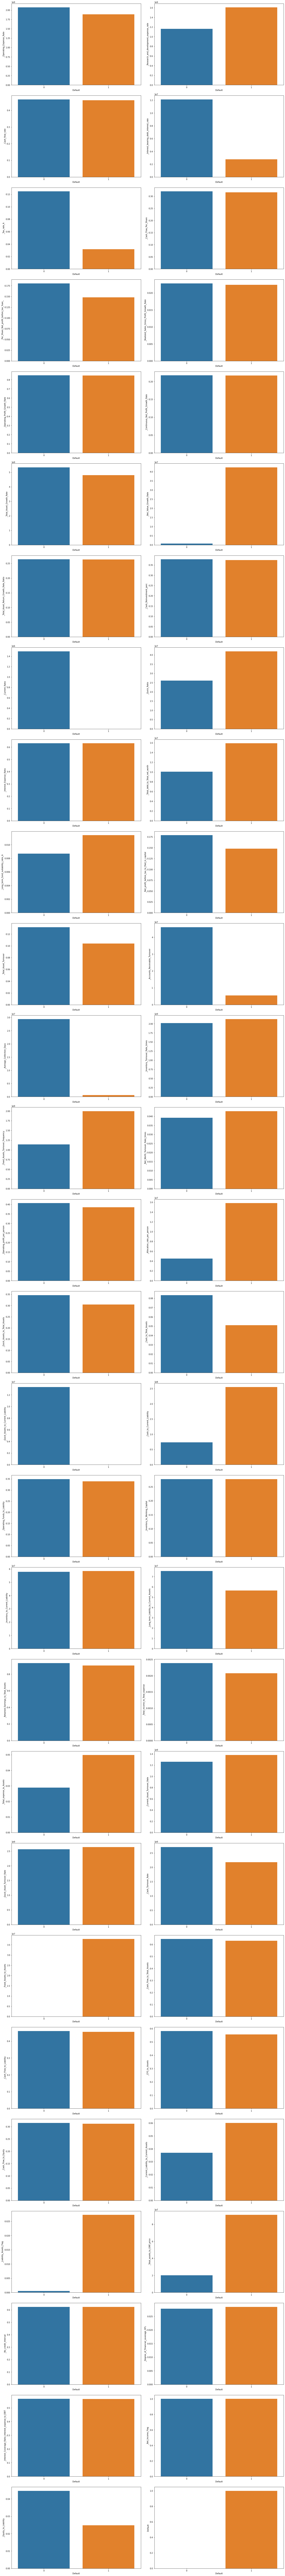

In [30]:
fig, ax = plt.subplots(figsize = (20, 180), nrows = 28, ncols = 2)

for i, col in enumerate(df.columns):
    sns.barplot(x = df['Default'], y = df[col], ax = ax[i//2, i%2],ci=None)
    
plt.tight_layout(pad = 1.1)

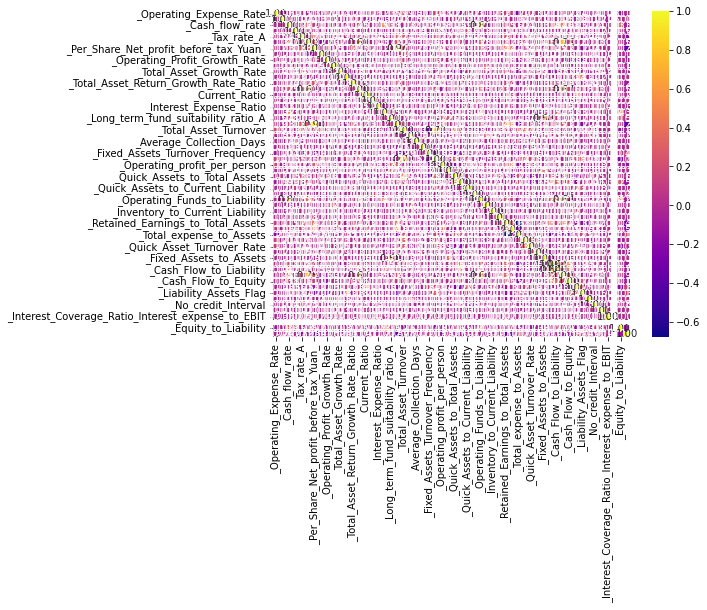

In [31]:
plt.subplots(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'plasma', fmt = '.2f');

## Since the data set is very imbalanced. We will apply SMOTE and then we will evaluate all models on both SMOTE as well as NON - SMOTE dataset and compare

# Model Building using Logistic Regression for 'Probability at default'

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

### Statsmodels Logit Modeling with backward elimination.
#### After each model is built, the variable that has a p-value of >0.05 will be dropped as their coefficients are unreliable. 

In [32]:
df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [33]:
X = df_dummy.drop(['Default'], axis=1)
y = df_dummy['Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=142,stratify=df_dummy['Default'])

#Statsmodel requires the labelled data, therefore, concatinating the y label to the train set.
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

In [34]:
model_1 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Net_Value_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Liability_Assets_Flag + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Net_Income_Flag + _Equity_to_Liability', data=df_train).fit()

         Current function value: 0.217599
         Iterations: 35


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1602
Method:                           MLE   Df Model:                           43
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3601
Time:                        23:56:33   Log-Likelihood:                -358.17
converged:                      False   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 5.181e-60
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   57.5670   2.82e+07   2.04e-06      1.000   -5.53e+07    5.53e+07
_Operating_Expense_Rate                   4.929e-11   3.26e-11      1.511      0.131   -1.46e-11    1.13e-10
_Research_and_development_expense_rate    1.672e-10   4.37e-11      3.823      0.000    8.15e-11    2.53e-10
_Cash_flow_rate                            -23.8390     19.130     -1.246      0.213     -61.334      13.655
_Interest_bearing_debt_interest_rate      6.649e-10   1.75e-09      0.379      0.704   -2.77e-09     4.1e-09
_Tax_rate_A                                 -1.3018      0.945     -1.377      0.169      -3.155       0.551
_Cash_Flow_Per_Share                         3.8035     11.305      0.336      0.737     -18.353      25.960
_Realized_Sales_Gross_Profit_Growth_Rate     1.3434      4.494      0.299      0.765      -7.465      10.152
_Operating_Profit_Growth_Rate              -40.5988     83.405     -0.487      0.626    -204.069     122.871
_Continuous_Net_Profit_Growth_Rate           4.9792     12.509      0.398      0.691     -19.537      29.496
_Total_Asset_Growth_Rate                 -4.149e-11   3.96e-11     -1.048      0.295   -1.19e-10    3.61e-11
_Net_Value_Growth_Rate                   -3.554e-11      0.000  -1.76e-07      1.000      -0.000       0.000
_Total_Asset_Return_Growth_Rate_Ratio     -209.2445    133.859     -1.563      0.118    -471.602      53.113
_Interest_Expense_Ratio                      5.7592      8.450      0.682      0.496     -10.803      22.322
_Total_debt_to_Total_net_worth            5.138e-09   1.24e-09      4.154      0.000    2.71e-09    7.56e-09
_Long_term_fund_suitability_ratio_A          4.7923      3.731      1.285      0.199      -2.520      12.104
_Total_Asset_Turnover                       -2.7356      1.832     -1.493      0.135      -6.326       0.855
_Accounts_Receivable_Turnover            -8.797e-10   8.27e-10     -1.063      0.288    -2.5e-09    7.42e-10
_Average_Collection_Days                 -3.638e-08      0.000     -0.000      1.000      -0.000       0.000
_Inventory_Turnover_Rate_times           -1.622e-11   3.31e-11     -0.490      0.624   -8.12e-11    4.87e-11
_Fixed_Assets_Turnover_Frequency          7.647e-11   3.62e-11      2.111      0.035    5.48e-12    1.47e-10
_Operating_profit_per_person                 0.1199      3.576      0.034      0.973      -6.888       7.128
_Allocation_rate_per_person              -9.035e-07      0.000     -0.004      0.997      -0.000       0.000
_Quick_Assets_to_Total_Assets                0.8709      0.718      1.212      0.225      -0.537       2.279
_Cash_to_Total_Assets                       -5.1802      1.941     -2.669      0.008      -8.984      -1.376
_Cash_to_Current_Liability               -3.527e-11   1.03e-10     -0.343      0.732   -2.37e-10    1.66e-10
_Inventory_to_Working_Capital                0.8707      5.852      0.149      0

In [36]:
model_1.pvalues.sort_values(ascending = False).head()

_Net_Value_Growth_Rate      1.000000
_Net_Income_Flag            0.999998
Intercept                   0.999998
_Liability_Assets_Flag      0.999950
_Average_Collection_Days    0.999733
dtype: float64

In [37]:
model_2 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Liability_Assets_Flag + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Net_Income_Flag + _Equity_to_Liability', data=df_train).fit()

         Current function value: 0.217599
         Iterations: 35


C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
print(model_2.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1604
Method:                           MLE   Df Model:                           41
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3601
Time:                        23:56:33   Log-Likelihood:                -358.17
converged:                      False   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 5.242e-61
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   57.5670   2.21e+13    2.6e-12      1.000   -4.33e+13    4.33e+13
_Operating_Expense_Rate                  

In [39]:
model_2.pvalues.sort_values(ascending = False).head()

Intercept                      1.000000
_Net_Income_Flag               1.000000
_Average_Collection_Days       0.999733
_Liability_Assets_Flag         0.996983
_Allocation_rate_per_person    0.996684
dtype: float64

In [40]:
model_3 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover + _Average_Collection_Days + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Liability_Assets_Flag + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability', data=df_train).fit()
print(model_3.summary())

         Current function value: 0.217599
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1604
Method:                           MLE   Df Model:                           41
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3601
Time:                        23:56:34   Log-Likelihood:                -358.17
converged:                      False   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 5.242e-61
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  115.1339     74.883      1.538      0.124

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
model_3.pvalues.sort_values(ascending = False).head()

_Average_Collection_Days              0.999733
_Allocation_rate_per_person           0.996722
_Fixed_Assets_to_Assets               0.996715
_Retained_Earnings_to_Total_Assets    0.995528
_Liability_Assets_Flag                0.995029
dtype: float64

In [42]:
model_4 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Allocation_rate_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Liability_Assets_Flag + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability', data=df_train).fit()
print(model_4.summary())

         Current function value: 0.217695
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1605
Method:                           MLE   Df Model:                           40
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3598
Time:                        23:56:34   Log-Likelihood:                -358.33
converged:                      False   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 1.888e-61
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  115.3677     74.878      1.541      0.123

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
model_4.pvalues.sort_values(ascending = False).head()

_Allocation_rate_per_person           0.996753
_Fixed_Assets_to_Assets               0.996750
_Liability_Assets_Flag                0.994321
_Operating_profit_per_person          0.992178
_Retained_Earnings_to_Total_Assets    0.989361
dtype: float64

In [44]:
model_5 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover  + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Liability_Assets_Flag + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability', data=df_train).fit()
print(model_5.summary())

         Current function value: 0.219424
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1606
Method:                           MLE   Df Model:                           39
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3547
Time:                        23:56:34   Log-Likelihood:                -361.17
converged:                      False   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 7.718e-61
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  127.3786     75.415      1.689      0.091

C:\Users\2261092\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
model_5.pvalues.sort_values(ascending = False).head()

_Liability_Assets_Flag          0.999992
_Fixed_Assets_to_Assets         0.999704
_Operating_profit_per_person    0.936273
_Total_expense_to_Assets        0.896458
_Cash_Flow_Per_Share            0.881387
dtype: float64

In [46]:
model_6 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover  + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Fixed_Assets_to_Assets + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability', data=df_train).fit()
print(model_6.summary())

Optimization terminated successfully.
         Current function value: 0.220461
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1607
Method:                           MLE   Df Model:                           38
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3517
Time:                        23:56:34   Log-Likelihood:                -362.88
converged:                       True   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 1.117e-60
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  137.

In [47]:
model_6.pvalues.sort_values(ascending = False).head()

_Fixed_Assets_to_Assets          0.999679
_Operating_profit_per_person     0.882074
_Inventory_to_Working_Capital    0.877598
_Cash_Flow_Per_Share             0.818472
_Current_Asset_Turnover_Rate     0.811600
dtype: float64

In [48]:
model_7 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover  + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Working_Capital + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability', data=df_train).fit()
print(model_7.summary())

Optimization terminated successfully.
         Current function value: 0.220902
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1608
Method:                           MLE   Df Model:                           37
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3504
Time:                        23:56:34   Log-Likelihood:                -363.60
converged:                       True   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 6.570e-61
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  138.

In [49]:
model_7.pvalues.sort_values(ascending = False).head()

_Inventory_to_Working_Capital               0.876475
_Operating_profit_per_person                0.849767
_Total_expense_to_Assets                    0.835084
_Total_assets_to_GNP_price                  0.792846
_Realized_Sales_Gross_Profit_Growth_Rate    0.774240
dtype: float64

In [50]:
model_8 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover  + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Operating_profit_per_person + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability', data=df_train).fit()
print(model_8.summary())

Optimization terminated successfully.
         Current function value: 0.220909
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1609
Method:                           MLE   Df Model:                           36
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3503
Time:                        23:56:35   Log-Likelihood:                -363.62
converged:                       True   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 1.993e-61
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  138.

In [51]:
model_8.pvalues.sort_values(ascending = False).head()

_Operating_profit_per_person                0.848629
_Total_expense_to_Assets                    0.833322
_Total_assets_to_GNP_price                  0.792198
_Current_Asset_Turnover_Rate                0.779043
_Realized_Sales_Gross_Profit_Growth_Rate    0.769461
dtype: float64

In [52]:
model_9 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover  + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Total_expense_to_Assets + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability', data=df_train).fit()
print(model_9.summary())

Optimization terminated successfully.
         Current function value: 0.220920
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1610
Method:                           MLE   Df Model:                           35
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3503
Time:                        23:56:35   Log-Likelihood:                -363.63
converged:                       True   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 5.997e-62
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  138.

In [53]:
model_9.pvalues.sort_values(ascending = False).head()

_Total_expense_to_Assets                    0.837387
_Total_assets_to_GNP_price                  0.796872
_Current_Asset_Turnover_Rate                0.778656
_Realized_Sales_Gross_Profit_Growth_Rate    0.768545
_Cash_to_Current_Liability                  0.760926
dtype: float64

In [54]:
model_10 = SM.logit(formula = 'Default ~ _Operating_Expense_Rate + _Research_and_development_expense_rate + _Cash_flow_rate + _Interest_bearing_debt_interest_rate + _Tax_rate_A + _Cash_Flow_Per_Share + _Realized_Sales_Gross_Profit_Growth_Rate + _Operating_Profit_Growth_Rate + _Continuous_Net_Profit_Growth_Rate + _Total_Asset_Growth_Rate + _Total_Asset_Return_Growth_Rate_Ratio + _Interest_Expense_Ratio + _Total_debt_to_Total_net_worth + _Long_term_fund_suitability_ratio_A + _Total_Asset_Turnover + _Accounts_Receivable_Turnover  + _Inventory_Turnover_Rate_times + _Fixed_Assets_Turnover_Frequency + _Quick_Assets_to_Total_Assets + _Cash_to_Total_Assets + _Cash_to_Current_Liability + _Inventory_to_Current_Liability + _Long_term_Liability_to_Current_Assets + _Retained_Earnings_to_Total_Assets + _Total_income_to_Total_expense + _Current_Asset_Turnover_Rate + _Quick_Asset_Turnover_Rate + _Cash_Turnover_Rate + _Cash_Flow_to_Liability + _Current_Liability_to_Current_Assets + _Total_assets_to_GNP_price + _No_credit_Interval + _Degree_of_Financial_Leverage_DFL + _Equity_to_Liability', data=df_train).fit()
print(model_10.summary())

Optimization terminated successfully.
         Current function value: 0.220933
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1611
Method:                           MLE   Df Model:                           34
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3503
Time:                        23:56:35   Log-Likelihood:                -363.66
converged:                       True   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 1.782e-62
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  134.

In [55]:
model_10.pvalues.sort_values(ascending = False)

_Retained_Earnings_to_Total_Assets          8.145820e-01
_Total_assets_to_GNP_price                  7.877373e-01
_Current_Asset_Turnover_Rate                7.841416e-01
_Realized_Sales_Gross_Profit_Growth_Rate    7.724384e-01
_Cash_to_Current_Liability                  7.606947e-01
_Cash_Flow_Per_Share                        7.315092e-01
_Interest_bearing_debt_interest_rate        7.233662e-01
_Quick_Asset_Turnover_Rate                  6.698098e-01
_Operating_Profit_Growth_Rate               6.592657e-01
_Continuous_Net_Profit_Growth_Rate          6.320335e-01
_Inventory_Turnover_Rate_times              6.149839e-01
_Inventory_to_Current_Liability             5.864148e-01
_Interest_Expense_Ratio                     5.432111e-01
_Current_Liability_to_Current_Assets        4.872598e-01
_Long_term_Liability_to_Current_Assets      4.095911e-01
_Total_Asset_Growth_Rate                    3.852450e-01
_Quick_Assets_to_Total_Assets               3.625331e-01
_Degree_of_Financial_Leverage_D

In [56]:
model_11 = SM.logit(formula = 'Default ~ _Research_and_development_expense_rate + _Total_debt_to_Total_net_worth + _Equity_to_Liability + _Total_income_to_Total_expense ', data = df_train).fit()
print(model_11.summary())

Optimization terminated successfully.
         Current function value: 0.247302
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1646
Model:                          Logit   Df Residuals:                     1641
Method:                           MLE   Df Model:                            4
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.2727
Time:                        23:56:35   Log-Likelihood:                -407.06
converged:                       True   LL-Null:                       -559.70
Covariance Type:            nonrobust   LLR p-value:                 7.815e-65
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 14.2371  

In [57]:
y_prob_pred_train = model_11.predict(df_train)

In [58]:
y_class_pred = []
for i in range(0, len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > 0.5:
        a = 1
    else:
        a = 0
    y_class_pred.append(a)

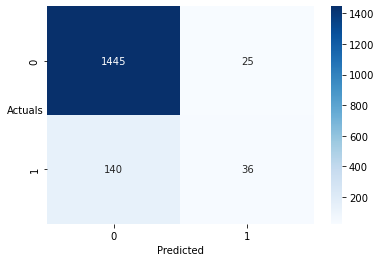

In [59]:
sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [60]:
print(metrics.classification_report(df_train['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.912     0.983     0.946      1470
           1      0.590     0.205     0.304       176

    accuracy                          0.900      1646
   macro avg      0.751     0.594     0.625      1646
weighted avg      0.877     0.900     0.877      1646



In [61]:
y_prob_pred_11 = model_11.predict()

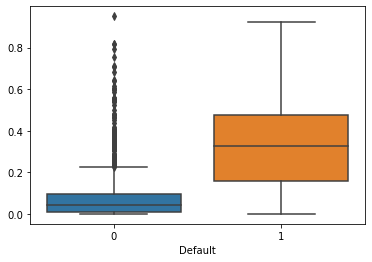

In [62]:
sns.boxplot(x = df_train['Default'], y = y_prob_pred_11)
plt.xlabel('Default');

In [63]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['Default'], y_prob_pred_train)

In [64]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.11225285970431002

In [65]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

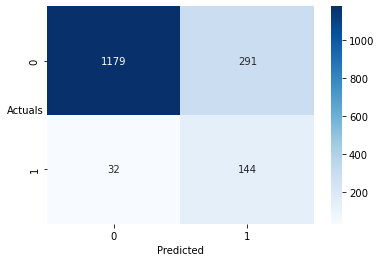

In [66]:
sns.heatmap((metrics.confusion_matrix(df_train['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [67]:
print(metrics.classification_report(df_train['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.974     0.802     0.880      1470
           1      0.331     0.818     0.471       176

    accuracy                          0.804      1646
   macro avg      0.652     0.810     0.675      1646
weighted avg      0.905     0.804     0.836      1646



In [68]:
y_prob_pred_test = model_11.predict(df_test)

In [69]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

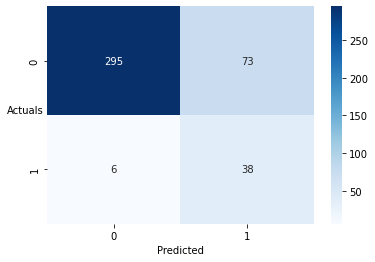

In [70]:
sns.heatmap((metrics.confusion_matrix(df_test['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [71]:
print(metrics.classification_report(df_test['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

           0      0.980     0.802     0.882       368
           1      0.342     0.864     0.490        44

    accuracy                          0.808       412
   macro avg      0.661     0.833     0.686       412
weighted avg      0.912     0.808     0.840       412

